In [85]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [242]:
# This is for fish type R

def f(y, L=5.4, r=0.65):
    return r*(1-y/L)*y

def y(t, L=5.4, r=0.65, y0=2):
    return L/(1 + ((L/y0)-1)*np.exp(-r*t))

def Euler(t_start, y_start, t_end, h):
    t_meas = np.arange(t_start, t_end+h, h)
    y_meas = [y_start]
    y_old = y_start
    for ti in np.arange(t_start, t_end, h):
        y_new = y_old + f(y_old)*h
        y_old = y_new
        y_meas.append(y_new)
    return np.array(y_meas), t_meas

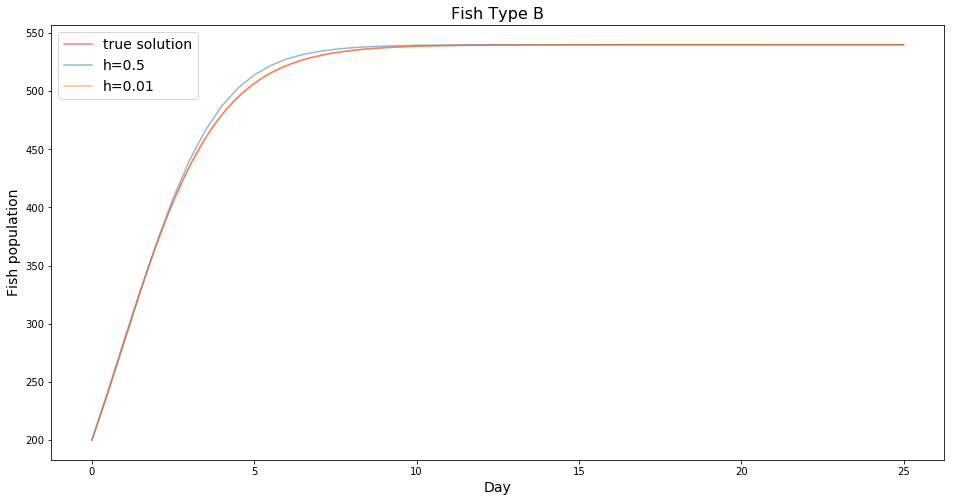

In [243]:
y1, t1 = Euler(t_start=0, y_start=2, t_end=25, h=0.5)
y2, t2 = Euler(t_start=0, y_start=2, t_end=25, h=0.01)
t_true = np.arange(0, 25+0.01, 0.01)
y_true = np.array([y(ti) for ti in t_true])
plt.figure(figsize=(16,8))
plt.plot(t_true, 100*y_true, label='true solution', alpha=0.5, color='r')
plt.plot(t1, 100*y1, label='h=0.5', alpha=0.5)
plt.plot(t2, 100*y2, label='h=0.01', alpha=0.5)
plt.legend(loc='best', fontsize=14)
plt.xlabel('Day', fontsize=14)
plt.ylabel('Fish population', fontsize=14)
plt.title('Fish Type B', fontsize=16)
plt.show()

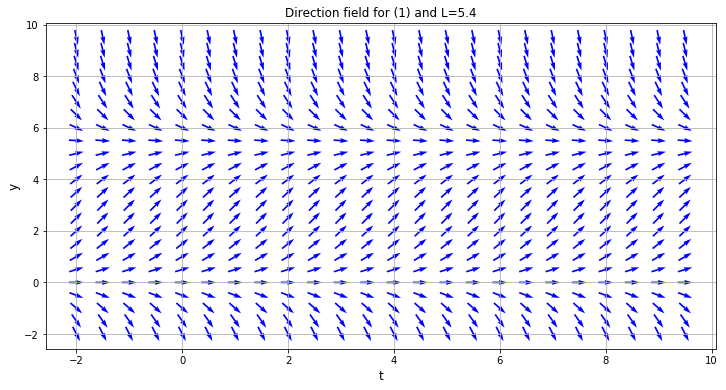

In [244]:
T, Y = np.meshgrid(np.arange(-2, 10, 0.5), np.arange(-2, 10, 0.5)) # Grid Points
dT = np.ones(np.shape(T)) 
dY = []
for i in range(len(Y)):
    dY.append([])
    for j in range(len(Y[i])):
        dY[i].append(f(Y[i][j]))
        
dY = np.array(dY)       
dT = dT/ np.sqrt(dT**2 + dY**2)
dY = dY/ np.sqrt(dT**2 + dY**2)
plt.figure(figsize=(12, 6))
plt.quiver(T, Y, dT, dY, pivot='mid', color='blue')
plt.xlabel('t', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('Direction field for (1) and L=5.4', fontsize=12)
plt.grid(True)
plt.show()

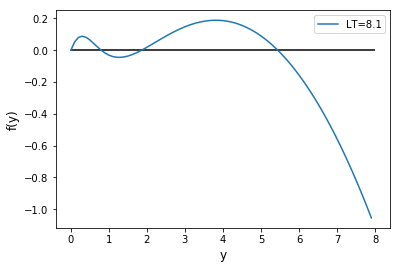

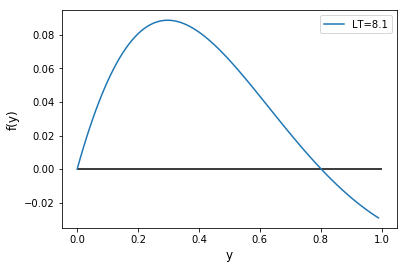

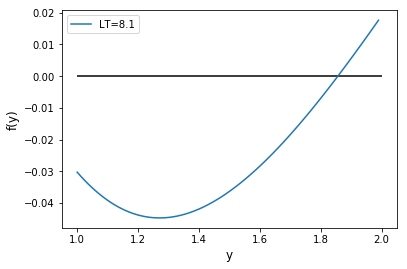

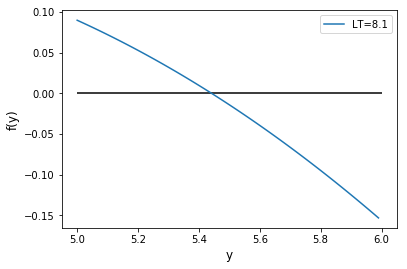

In [251]:
def f(y, L, r=0.65, p=1.2, q=1):
    return r*(1-(y/L))*y - (p*(y**2))/(q+y**2)

LT = 8.1
y_range = np.arange(0, 8, 0.1)
fT = [f(yi, LT) for yi in y_range]
plt.plot(y_range, fT, label='LT=8.1')
plt.hlines(y=0, xmin=0, xmax=8)
plt.legend(loc='best')
plt.xlabel('y', fontsize=12)
plt.ylabel('f(y)', fontsize=12)
plt.show()


y_range = np.arange(0, 1, 0.01)
fT = [f(yi, LT) for yi in y_range]
plt.plot(y_range, fT, label='LT=8.1')
plt.hlines(y=0, xmin=0, xmax=1)
plt.legend(loc='best')
plt.xlabel('y', fontsize=12)
plt.ylabel('f(y)', fontsize=12)
plt.show()

y_range = np.arange(1, 2, 0.01)
fT = [f(yi, LT) for yi in y_range]
plt.plot(y_range, fT, label='LT=8.1')
plt.hlines(y=0, xmin=1, xmax=2)
plt.legend(loc='best')
plt.xlabel('y', fontsize=12)
plt.ylabel('f(y)', fontsize=12)
plt.show()

y_range = np.arange(5, 6, 0.01)
fT = [f(yi, LT) for yi in y_range]
plt.plot(y_range, fT, label='LT=8.1')
plt.hlines(y=0, xmin=5, xmax=6)
plt.legend(loc='best')
plt.xlabel('y', fontsize=12)
plt.ylabel('f(y)', fontsize=12)
plt.show()

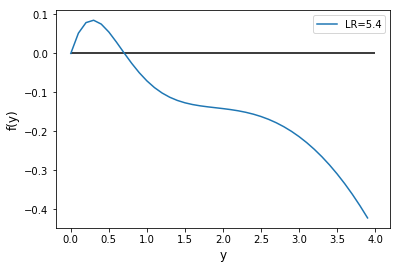

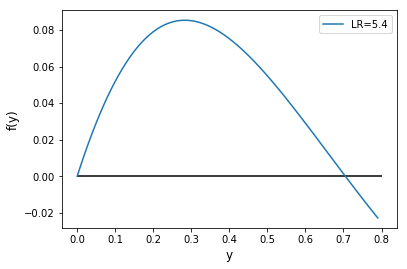

In [250]:
LR = 5.4
y_range = np.arange(0, 4, 0.1)
fT = [f(yi, LR) for yi in y_range]
plt.plot(y_range, fT, label='LR=5.4')
plt.hlines(y=0, xmin=0, xmax=4)
plt.legend(loc='best')
plt.xlabel('y', fontsize=12)
plt.ylabel('f(y)', fontsize=12)
plt.show()


y_range = np.arange(0, 0.8, 0.01)
fT = [f(yi, LR) for yi in y_range]
plt.plot(y_range, fT, label='LR=5.4')
plt.hlines(y=0, xmin=0, xmax=0.8)
plt.legend(loc='best')
plt.xlabel('y', fontsize=12)
plt.ylabel('f(y)', fontsize=12)
plt.show()

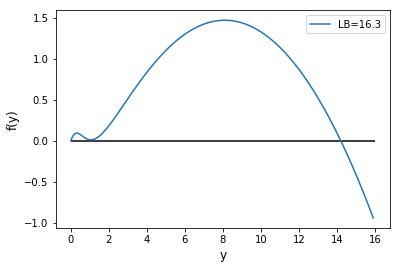

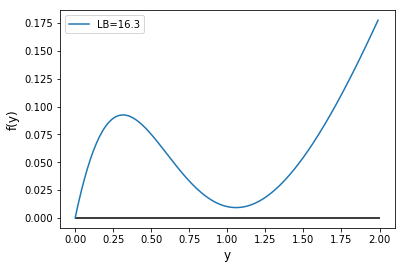

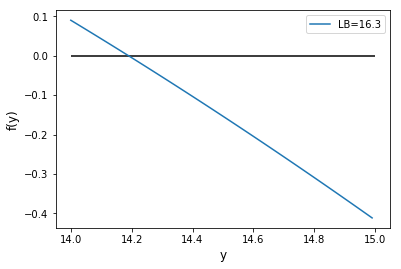

In [249]:
LB = 16.3
y_range = np.arange(0, 16, 0.1)
fT = [f(yi, LB) for yi in y_range]
plt.plot(y_range, fT, label='LB=16.3')
plt.hlines(y=0, xmin=0, xmax=16)
plt.legend(loc='best')
plt.xlabel('y', fontsize=12)
plt.ylabel('f(y)', fontsize=12)
plt.show()


y_range = np.arange(0, 2, 0.01)
fT = [f(yi, LB) for yi in y_range]
plt.plot(y_range, fT, label='LB=16.3')
plt.hlines(y=0, xmin=0, xmax=2)
plt.legend(loc='best')
plt.xlabel('y', fontsize=12)
plt.ylabel('f(y)', fontsize=12)
plt.show()


y_range = np.arange(14, 15, 0.01)
fT = [f(yi, LB) for yi in y_range]
plt.plot(y_range, fT, label='LB=16.3')
plt.hlines(y=0, xmin=14, xmax=15)
plt.legend(loc='best')
plt.xlabel('y', fontsize=12)
plt.ylabel('f(y)', fontsize=12)
plt.show()

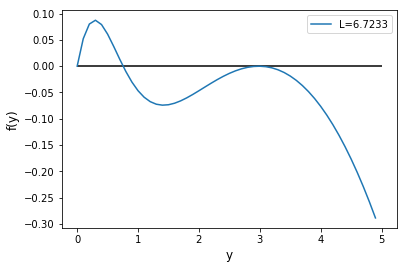

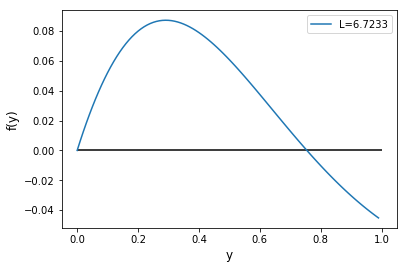

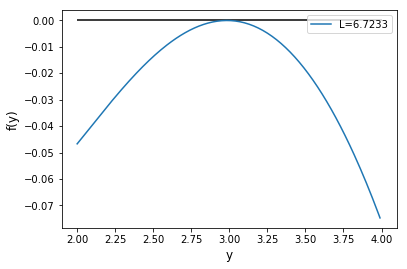

In [255]:
L = 6.7233
y_range = np.arange(0, 5, 0.1)
fT = [f(yi, L) for yi in y_range]
plt.plot(y_range, fT, label='L=6.7233')
plt.hlines(y=0, xmin=0, xmax=5)
plt.legend(loc='best')
plt.xlabel('y', fontsize=12)
plt.ylabel('f(y)', fontsize=12)
plt.show()


y_range = np.arange(0, 1, 0.01)
fT = [f(yi, L) for yi in y_range]
plt.plot(y_range, fT, label='L=6.7233')
plt.hlines(y=0, xmin=0, xmax=1)
plt.legend(loc='best')
plt.xlabel('y', fontsize=12)
plt.ylabel('f(y)', fontsize=12)
plt.show()


y_range = np.arange(2, 4, 0.01)
fT = [f(yi, L) for yi in y_range]
plt.plot(y_range, fT, label='L=6.7233')
plt.hlines(y=0, xmin=2, xmax=4)
plt.legend(loc='best')
plt.xlabel('y', fontsize=12)
plt.ylabel('f(y)', fontsize=12)
plt.show()

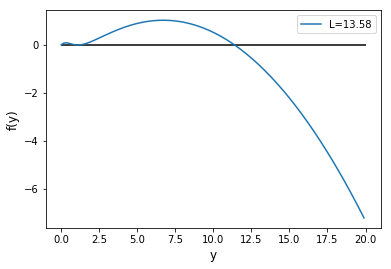

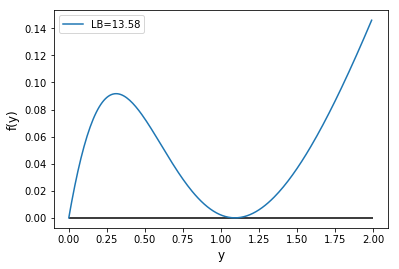

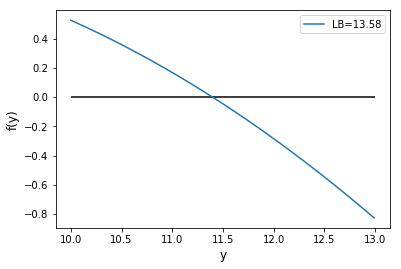

In [273]:
L = 13.58
y_range = np.arange(0, 20, 0.1)
fT = [f(yi, L) for yi in y_range]
plt.plot(y_range, fT, label='L=13.58')
plt.hlines(y=0, xmin=0, xmax=20)
plt.legend(loc='best')
plt.xlabel('y', fontsize=12)
plt.ylabel('f(y)', fontsize=12)
plt.show()


y_range = np.arange(0, 2,0.01)
fT = [f(yi, L) for yi in y_range]
plt.plot(y_range, fT, label='LB=13.58')
plt.hlines(y=0, xmin=0, xmax=2)
plt.legend(loc='best')
plt.xlabel('y', fontsize=12)
plt.ylabel('f(y)', fontsize=12)
plt.show()


y_range = np.arange(10, 13, 0.01)
fT = [f(yi, L) for yi in y_range]
plt.plot(y_range, fT, label='LB=13.58')
plt.hlines(y=0, xmin=10, xmax=13)
plt.legend(loc='best')
plt.xlabel('y', fontsize=12)
plt.ylabel('f(y)', fontsize=12)
plt.show()